### Project Checklist

<li>Frame the problem and look at the big picture</li>
<li>Get the data</li>
<li>Explore the data to get insights</li>
<li>Prepare the data to better expose the underlying data patterns to machine Learning algorithms</li>
<li>Explore many different models and shortlist the best ones</li>
<li>Fine-tune your models and combine them into a great solution</li>
<li>Present your solution</li>
<li>Launch, monitor and maintain your system</li>

### Objective

To build a model to predict median housing prices based on 1990 housing census. Data was obtained from kaggle https://www.kaggle.com/camnugent/california-housing-prices

### Imports

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [97]:
data = pd.read_csv('../dataBank/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [99]:
# missing values in total_bedrooms
data['total_bedrooms'].isnull().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

In [100]:
# ocean_proximity(categorical) value types
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

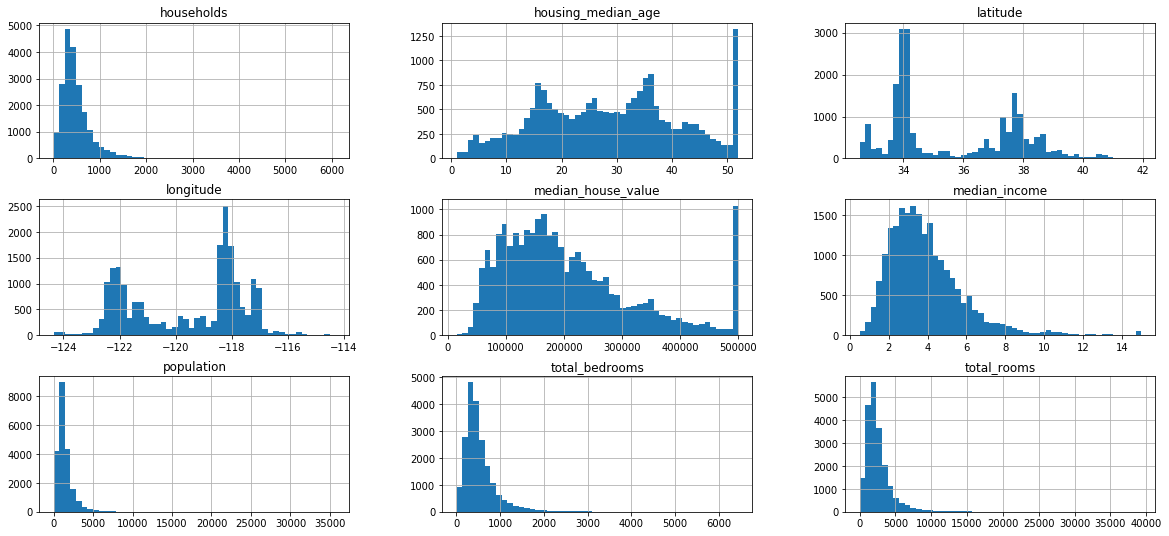

In [101]:
data.hist(bins=50, figsize=(20,9))
plt.show()

In [102]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [103]:
# Creating training and test sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [104]:
# Creating income brackets. Dividing median income by 1.5 limits the number of categories. 
# All categories greater than 5.0 are merged into category 5.

data['income_brackets'] = np.ceil(data['median_income']/1.5)
data['income_brackets'].where(data['income_brackets'] < 5, 5.0, inplace=True)
data['income_brackets'].value_counts().sort_index()

1.0     822
2.0    6581
3.0    7236
4.0    3639
5.0    2362
Name: income_brackets, dtype: int64

In [105]:
# Creating stratified training and test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data, data['income_brackets']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
strat_test_set['income_brackets'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_brackets, dtype: float64

In [108]:
# drop income brackets columns from both train and test sets
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_brackets', axis=1, inplace=True)

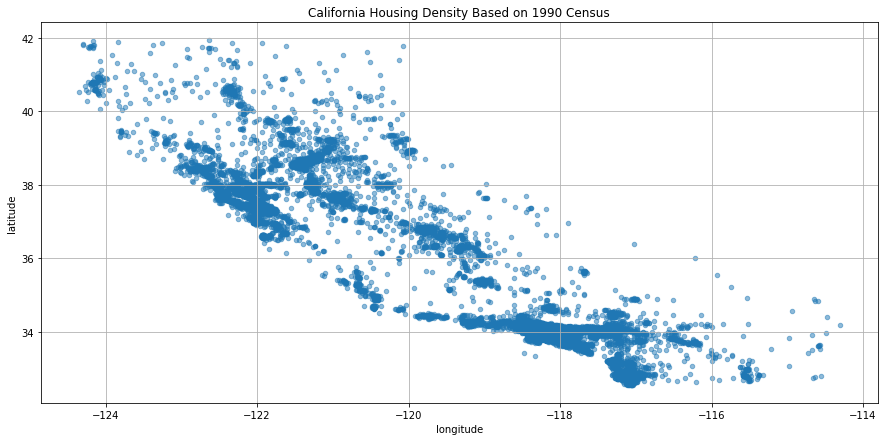

In [120]:
# Copying and plotting the training data set only
data = strat_train_set.copy()
data.plot(kind='scatter', x='longitude', y='latitude', title='California Housing Density Based on 1990 Census', figsize=(15,7), grid=True, alpha=0.5)
plt.show()